# Seaborn in data visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Loading of datasets
 - We will use in-built datasets withing seaborn library

In [3]:
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
planets = sns.load_dataset("planets")


In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Scatter plot 
 - Shows the distribution of tips offered compared to the total bill, depending on the day of the week and size of the meal
 - Hue adds color separation based on the categories of a variable making it easier to distinguish different groups in a plot.
 - Pallette allows control of the color scheme of the data.
     -INTERPRETATION:
    -X-axis: Total bill amount.
    -Y-axis: Tip given.
    -As the total bill increases, the tip generally increases but not perfectly. Some customers tipped high or low regardless of the bill.

<Axes: xlabel='tip', ylabel='total_bill'>

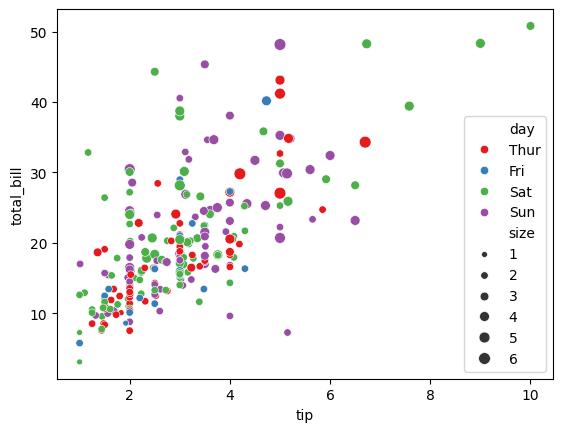

In [5]:
sns.scatterplot(data= tips,x="tip",y="total_bill",hue='day',size="size",palette="Set1")

# Histogram
 - Distribution of the tips using a histogram
 - The curve shows where most tips were depending on the total number of tips made.

<Axes: xlabel='tip', ylabel='Count'>

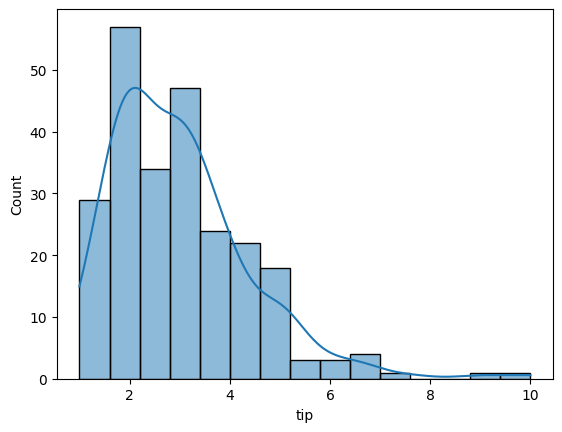

In [6]:
sns.histplot(tips['tip'],kde=True,bins=15)

# KDE plot
 - Separate curves for male and female customers colored differently.
 -You can now see if men or women tend to spend more or less.
 - The blue peak is more to the right men spend more.

<Axes: xlabel='total_bill', ylabel='Density'>

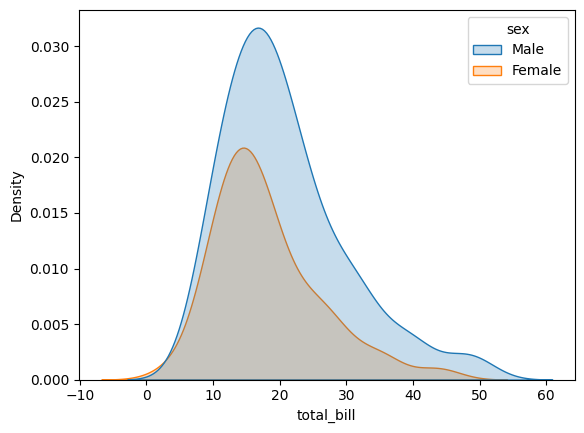

In [7]:
sns.kdeplot(data=tips, x='total_bill', hue='sex', fill=True)

# Distribution plot(Displot)
 - Similar to a histogram
 -  Difference is in the height of the graph


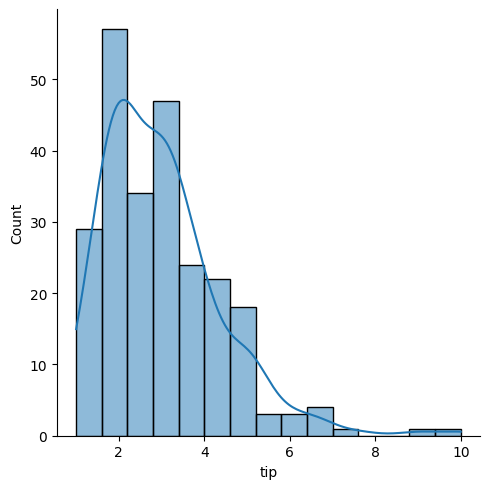

In [8]:
sns.displot(tips['tip'],kde=True,bins=15)

# Bar plot
 - Shows the distribution of the tips depending o the sex column
 - The blue bar(male) is higher than the brown(females), hence most males tipped than the females

C:\Users\Admin\AppData\Local\Temp\ipykernel_4880\3582186890.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tips,x="sex",y="tip",palette="muted")


<Axes: xlabel='sex', ylabel='tip'>

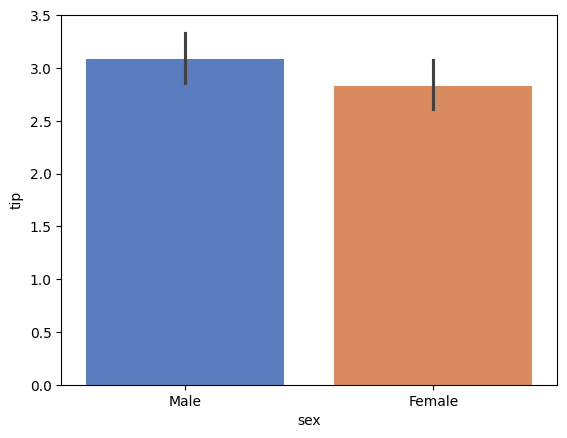

In [9]:
sns.barplot(data=tips,x="sex",y="tip",palette="muted")

# Box plot
 - Shows the distribution of tips offered depending on sex on the different days of the week
 - The line in the middle shows the median and the elongated one shows the maximum tip offered
 - You can compare how male and female customers spent on each day.

<Axes: xlabel='day', ylabel='tip'>

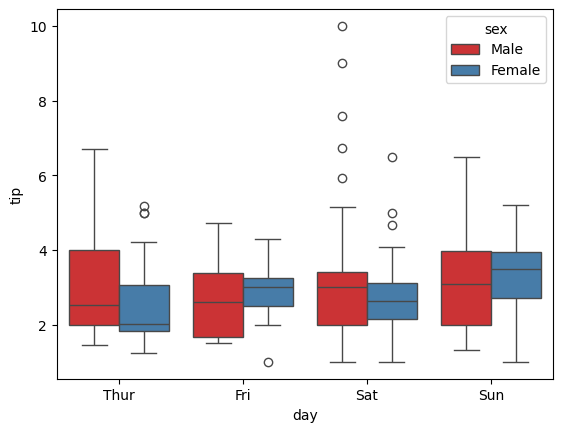

In [17]:
sns.boxplot(data=tips,x="day",y="tip",hue="sex",palette="Set1")

# Strip plot
 - Similar as box plot. 
 - Doesn't show the lines as shown in a box plot
 - Dodge = True used separates the male and females 
 -X-axis: Categories (e.g., Thursday, Friday, Saturday, Sunday).
 -Y-axis: Value of total bill.

Dots: Each dot is an individual bill from a customer.
Where most dots (bills) are clustered (denser = more customers spent around that amount).

<Axes: xlabel='day', ylabel='tip'>

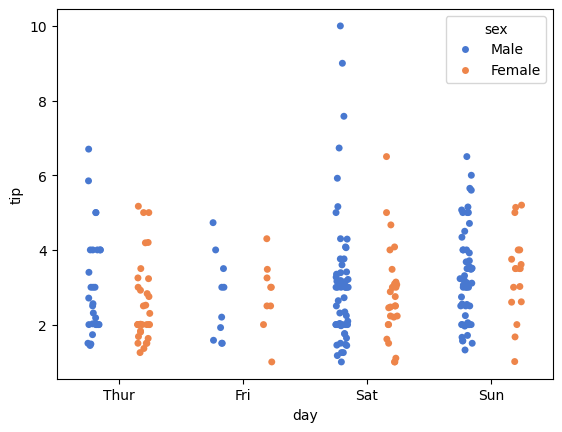

In [11]:
sns.stripplot(data=tips,x="day",y="tip",hue="sex",palette="muted",dodge=True)

# Joint plot
 -  Scatter plot with regression line in the middle and histograms on the top and right sides showing the distribution of each variable.
 - Top histogram - Distribution (spread) of tip amounts.
 - Right Histogram-Distribution of total bill amounts.
 


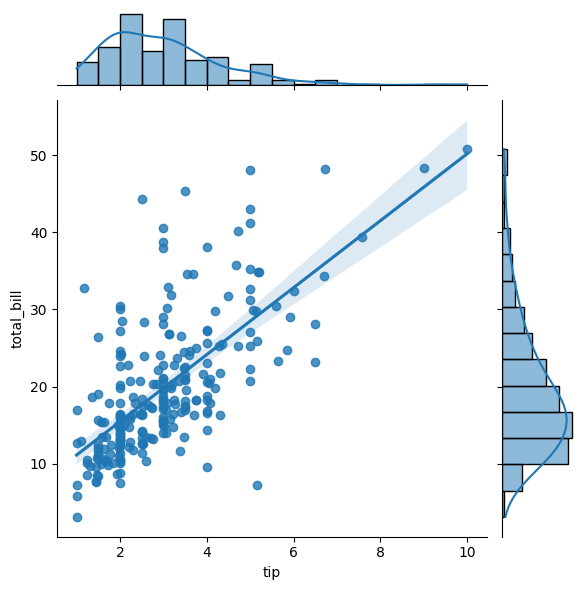

In [12]:
sns.jointplot(data=tips,x="tip",y="total_bill",kind="reg")
# kind="reg" used to show the regression

# Joint plot with KDE
 - Center Plot	A contour plot(like a topographic map)- showing where the most data points are (like hills of density).
 -Top Plot- KDE curve for the distribution of tips.
 -Right Plot-KDE curve for the distribution of total bills.
- The darkest area in the middle shows where most customers' tips and bills are clustered.



C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


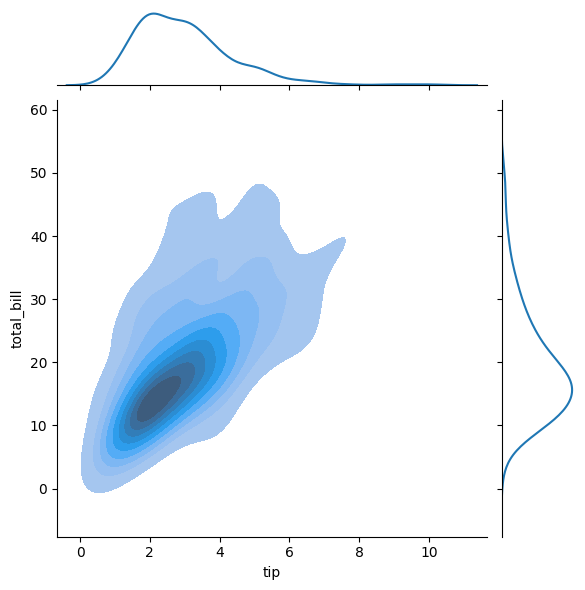

In [13]:
# Shows the kde plot kind in the joint plot
sns.jointplot(data=tips,x="tip",y="total_bill",kind="kde",shade=True)

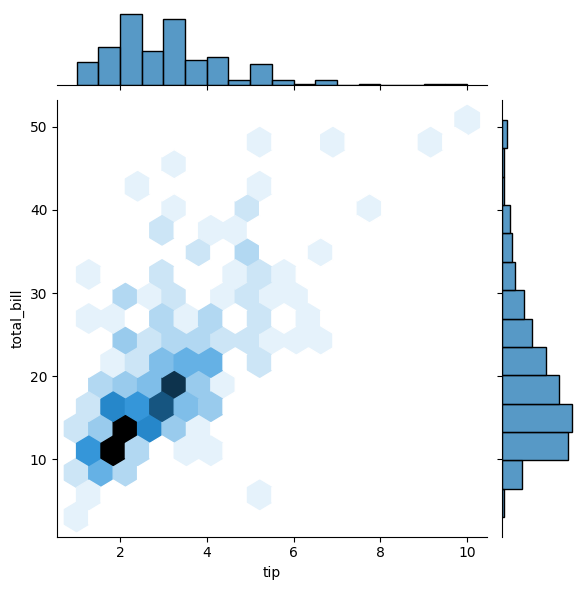

In [18]:
# Plots hexagons instead(Similar to the above)
sns.jointplot(data=tips,x="tip",y="total_bill",kind="hex")

# Pair plot
 - Combines individual features
 - If same value is plotted against itself(correlation = 1),it shows a straight line

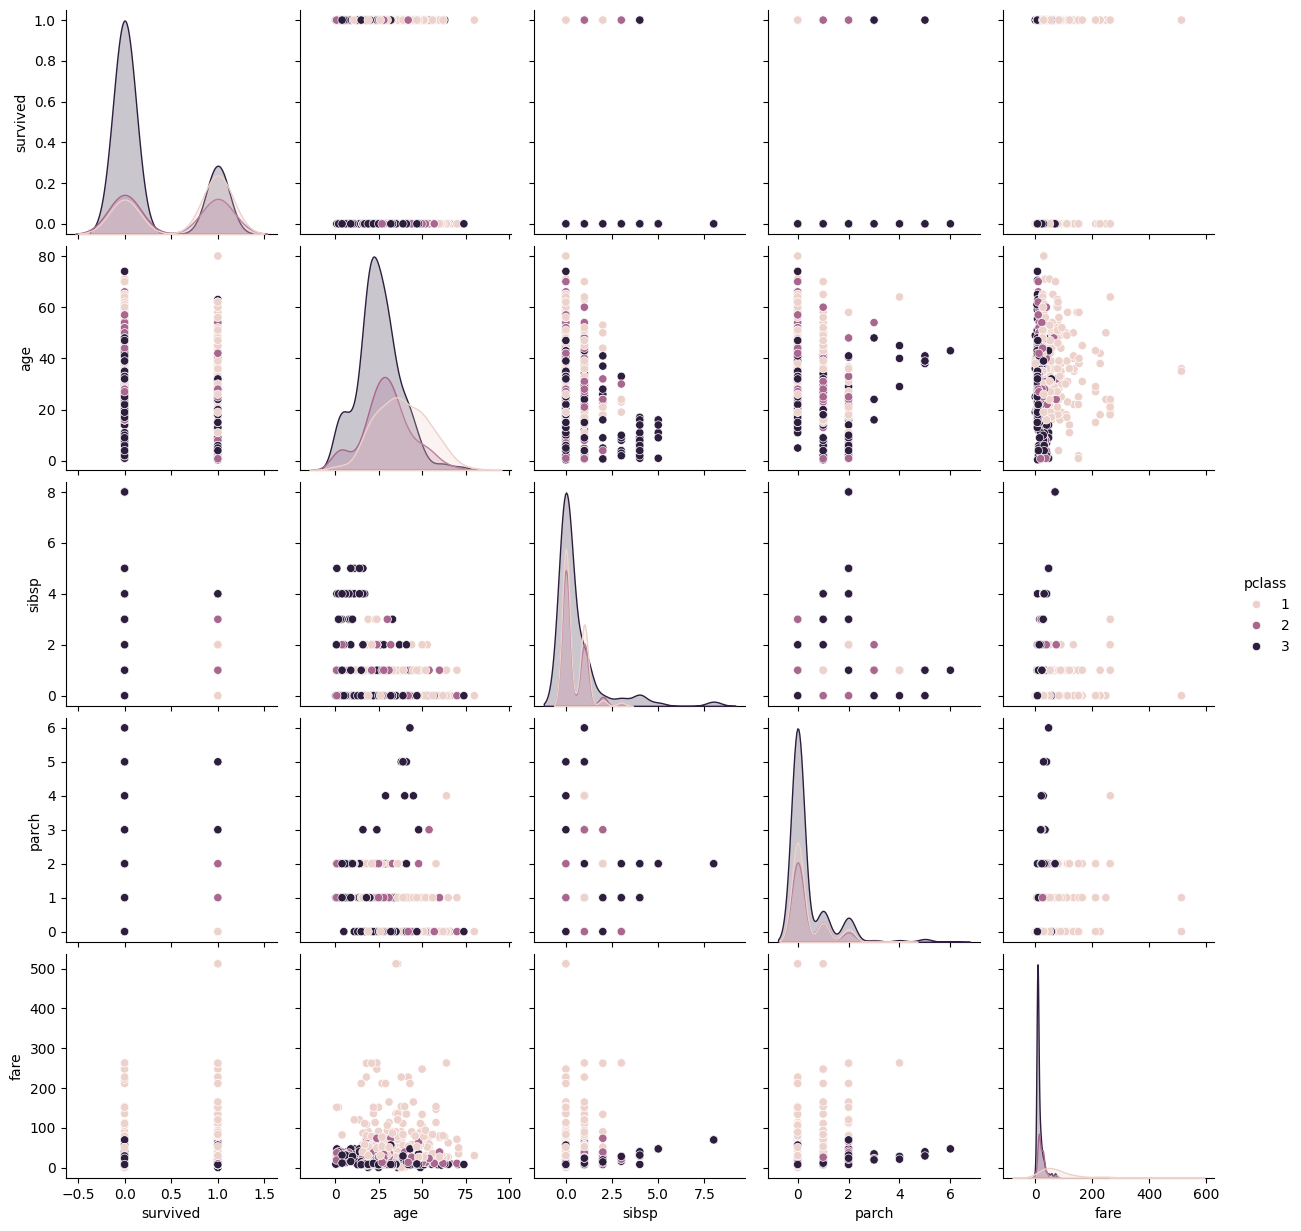

In [15]:
sns.pairplot(titanic.select_dtypes(['number']),hue="pclass")

# Correlation Heatmap
 -titanic.corr(numeric_only=True):
 -Calculates correlation coefficients between all numeric columns in the Titanic dataset.

 -['survived']:
 -Picks only the correlation of each column with 'survived' (the target variable: 0 = did not survive, 1 = survived).

 -sort_values(ascending=False):
 -Sorts the correlations from highest to lowest — showing which variables are most positively or negatively related to survival.
Correlation = 1: Perfect positive relationship.
Correlation = -1: Perfect negative relationship.
Correlation = 0: No relationship.
 - Heatmap of all numeric correlations in the Titanic dataset.
 -annot=True:
 -Shows the exact correlation values inside the heatmap cells.
 -cmap="YlGnBu":
 -Sets the color theme: Yellow-Green-Blue ;helps you visually spot high vs low correlations:
   -Dark Blue: Strong positive correlation.
   -Light Yellow: Strong negative correlation.
Each box shows the correlation between two numerical variables.
The darker/bluer the box, the stronger the positive correlation.
The lighter/yellower the box, the stronger the negative correlation.
Boxes near zero (light green) = little or no relationship.




<Axes: >

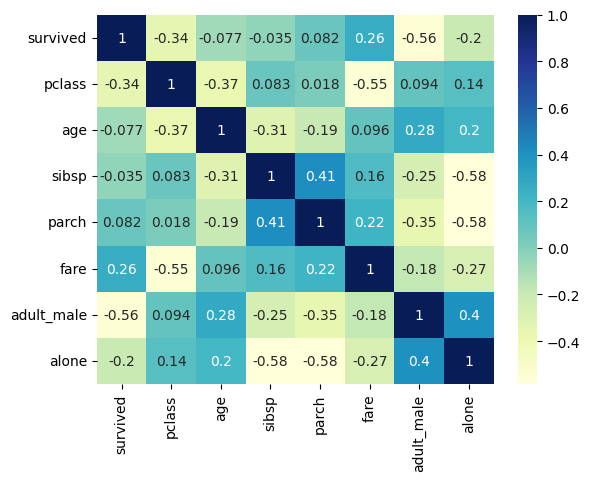

In [ ]:
corr = titanic.corr(numeric_only=True)['survived'].sort_values(ascending=False)
sns.heatmap(titanic.corr(numeric_only=True),annot=True,cmap="YlGnBu")